imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score #for classification
from sklearn.metrics import max_error,mean_absolute_error,r2_score,root_mean_squared_error #for regression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



## setup functions

best parameters definition

In [ ]:
def best_parameters_classification(X_train,y_train): #This function will be use to define the best parameters for each dataset classification
    # parameters = {
    #     "eta" : [0.01, 0.05, 0.1, 0.3, 0.5],
    #     "gamma" : [0, 0.1, 0.2, 0.3, 0.4],
    #     "max_depth" : [3, 5, 8, 10, 20, 30, 40, 50, 75, 100],
    #     "min_child_weight" : [1, 3, 5, 7, 10, 20, 30, 40, 50, 75, 100],
    #     "subsample" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    #     "lambda" : [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 10],
    #     "alpha" : [0, 0.1, 0.3, 0.5, 0.7, 1],
    #     "objective": ["reg:squarederror", "reg:squarelogerror","reg:logistic","multi:softmax"],
    # }
    parameters = {
        "eta" : [0.01, 0.5],
        "gamma" : [0, 0.4],
        "max_depth" : [3, 100],
        "min_child_weight" : [1, 100],
        "subsample" : [0.5, 1],
        "lambda" : [0,  10],
        "alpha" : [0,  1],
        "objective": ["reg:squarederror","multi:softmax"],
    }
    xgb_model = xgb.XGBClassifier()
    grid_search = GridSearchCV(xgb_model, parameters, scoring= 'neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)    
    return (grid_search.best_params_, grid_search.best_score_) #(parameters,score)




def best_parameters_regression(X_train,y_train): #This function will be use to define the best parameters for each dataset regression
    # parameters = {
    #     "eta" : [0.01, 0.05, 0.1, 0.3, 0.5],
    #     "gamma" : [0, 0.1, 0.2, 0.3, 0.4],
    #     "max_depth" : [3, 5, 8, 10, 20, 30, 40, 50, 75, 100],
    #     "min_child_weight" : [1, 3, 5, 7, 10, 20, 30, 40, 50, 75, 100],
    #     "subsample" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    #     "lambda" : [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 10],
    #     "alpha" : [0, 0.1, 0.3, 0.5, 0.7, 1],
    #     "objective": ["reg:squarederror", "reg:squarelogerror","reg:logistic","multi:softmax"],
    # }
    parameters = {
        "eta" : [0.01, 0.5],
        "gamma" : [0, 0.4],
        "max_depth" : [3, 100],
        "min_child_weight" : [1, 100],
        "subsample" : [0.5, 1],
        "lambda" : [0,  10],
        "alpha" : [0,  1],
        "objective": ["reg:squarederror","multi:softmax"],
    }
    xgb_model = xgb.XGBClassifier()
    grid_search = GridSearchCV(xgb_model, parameters, scoring= 'neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)    
    return (grid_search.best_params_, grid_search.best_score_) #(parameters,score)

#testing area
data = pd.read_csv("data/classification/iris.csv")
X = data.drop(columns=["Species"])
label_encoder = LabelEncoder()
y = data["Species"]
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_param = best_parameters_classification(X_train,y_train)
print(best_param) #testing the function


c:\Users\mathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


({'alpha': 0, 'eta': 0.01, 'gamma': 0, 'lambda': 0, 'max_depth': 3, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'subsample': 0.5}, np.float64(-0.008333333333333333))


prediction

In [21]:
def predict_classification(X_train, y_train, X_test, y_test, parameters): #This function will be use to predict the model
    xgb_model = xgb.XGBClassifier(parameters)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    return y_pred


def predict_regression(X_train, y_train, X_test, y_test, parameters): #This function will be use to predict the model
    xgb_model = xgb.XGBRegressor(**parameters)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    return y_pred


y_pred = predict_classification(X_train, y_train, X_test, y_test, best_param)
y_pred

c:\Users\mathy\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

scores

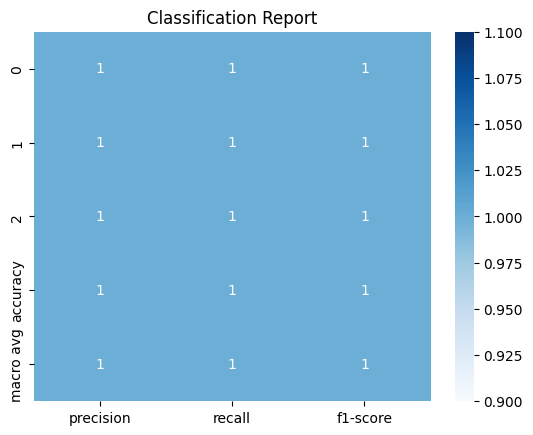

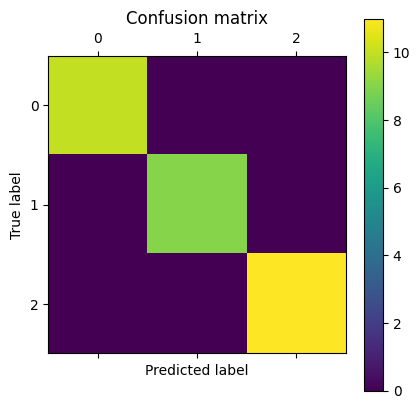

The overall accuracy is:  1.0
The overall precision is:  1.0
The overall recall is:  1.0
The overall f1 is:  1.0
The classification report is:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}}


In [ ]:
def scores_classification(y_test, y_pred): 
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = float(accuracy_score(y_test, y_pred))
    precision = float(precision_score(y_test, y_pred, average='weighted'))
    recall = float(recall_score(y_test, y_pred, average='weighted'))
    f1 = float(f1_score(y_test, y_pred, average='weighted'))
    class_report  = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()
    sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()
    
    
    
    
    
    plt.matshow(conf_matrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("The overall accuracy is: ", accuracy)
    print("The overall precision is: ", precision)
    print("The overall recall is: ", recall)
    print("The overall f1 is: ", f1)
    print("The classification report is: ", class_report)

def scores_regression(y_test, y_pred):
    max_error_score = float(max_error(y_test, y_pred))
    mean_absolute_error_score = float(mean_absolute_error(y_test, y_pred))
    r2 = float(r2_score(y_test, y_pred))
    root_mean_squared_error_score = float(np.sqrt(mean_squared_error(y_test, y_pred)))
    class_report  = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()
    sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()
    
    
    print("The max error is: ", max_error_score)
    print("The mean absolute error is: ", mean_absolute_error_score)
    print("The r2 is: ", r2)
    print("The root mean squared error is: ", root_mean_squared)
    print("The classification report is: ", class_report)
    

